In [37]:
!pip install boruta
!pip install graphviz
!pip install pydotplus
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [39]:
from sklearn.datasets import load_wine
df = load_wine(as_frame=True).frame

In [40]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [41]:
X =  df.drop(labels = "target", axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
estimator = RandomForestRegressor()

In [43]:
boruta = BorutaPy(estimator = estimator, n_estimators = 'auto', max_iter = 100)
boruta.fit(np.array(X_train), np.array(y_train))

BorutaPy(estimator=RandomForestRegressor(n_estimators=44,
                                         random_state=RandomState(MT19937) at 0x7FA9636A1D10),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FA9636A1D10)

In [44]:
# Important features
important = list(X.columns[boruta.support_])
print(f"Features confirmed as important:   {important}")

# Other features
print(f"\nUnconfirmed features (tentative):  {list(X.columns[boruta.support_weak_])}")
print(f"\nFeatures confirmed as unimportant: {list(X.columns[~(boruta.support_ | boruta.support_weak_)])}")

Features confirmed as important:   ['alcohol', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Unconfirmed features (tentative):  []

Features confirmed as unimportant: ['malic_acid', 'ash', 'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins']


In [45]:
X_train = X_train[important]
X_test = X_test[important]

In [46]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

# Test Data
scaler = StandardScaler().fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [47]:
model = DecisionTreeClassifier(max_depth =3, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[15,  1,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      0.95      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [49]:
import numpy as np
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(model.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                        feature  importance
3                    flavanoids       0.449
4               color_intensity       0.423
7                       proline       0.128
0                       alcohol       0.000
1             alcalinity_of_ash       0.000
2                     magnesium       0.000
5                           hue       0.000
6  od280/od315_of_diluted_wines       0.000


In [50]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(max_depth =3, random_state = 0)
params = {'max_depth': range(1,10), 
          'min_samples_leaf' : range(1,10),
          'min_samples_split': [2, 3] + np.arange(0.1, 0.9, 0.1).tolist(),
          'criterion' : ['gini', 'entropy']
        }
scores = ['recall', 'precision', 'f1']
for score in scores:
    print(f"Tuning for {score}")    
    clf = GridSearchCV(
        model, params,
        cv = 10,
        n_jobs = -1, 
        scoring = f'{score}_macro',
        verbose = 0,
        refit = True)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    print(clf.best_score_, '\n\n')
    model =  clf.best_estimator_

print("FINAL")
print(clf.best_params_)
print(clf.best_score_)

Tuning for recall
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.30000000000000004}
0.9333333333333332 


Tuning for precision
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.30000000000000004}
0.9427777777777779 


Tuning for f1
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.30000000000000004}
0.9334078884078882 


FINAL
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.30000000000000004}
0.9334078884078882


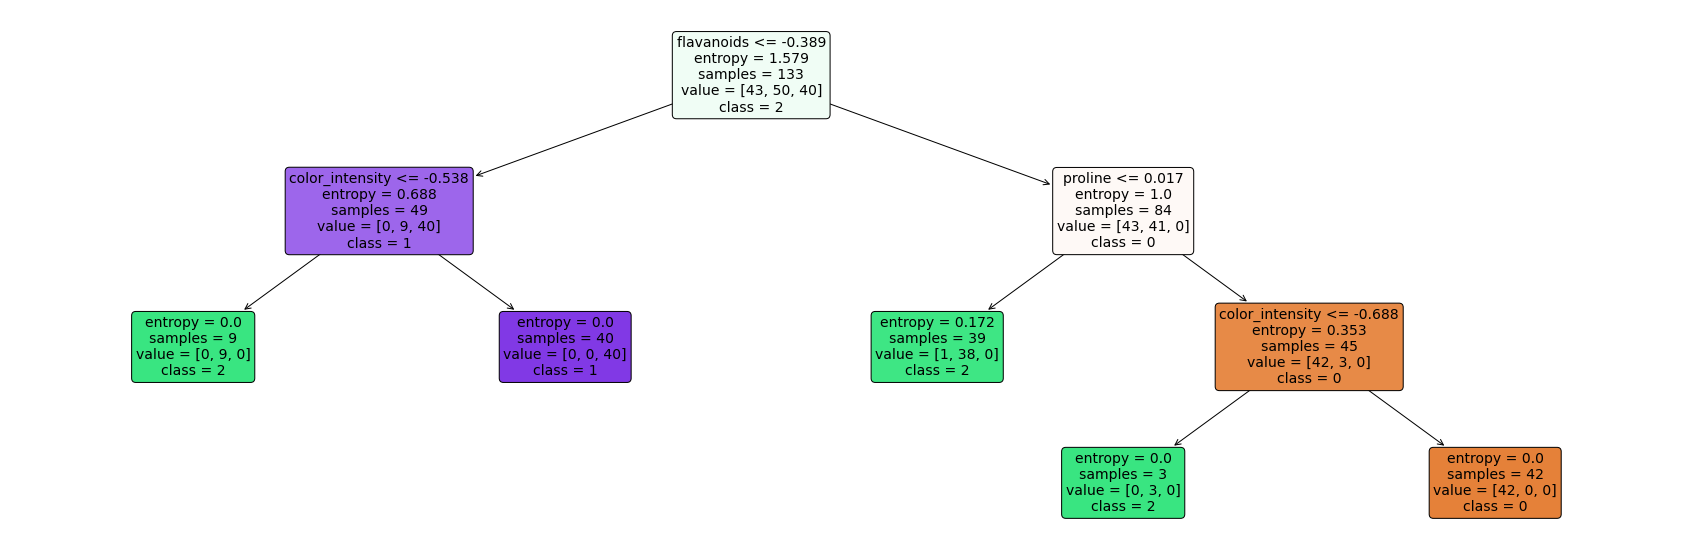

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plot_tree(model,
          #use the feature names stored
          feature_names = X_train.columns,
          #use the class names stored
          class_names = y_train.astype(str).unique(),
          rounded = True,
          filled = True,
          fontsize=14)
plt.show()

In [56]:
from sklearn.tree import export_text, export_graphviz
text_representation = export_text(model)
print(text_representation)

|--- feature_3 <= -0.39
|   |--- feature_4 <= -0.54
|   |   |--- class: 1
|   |--- feature_4 >  -0.54
|   |   |--- class: 2
|--- feature_3 >  -0.39
|   |--- feature_7 <= 0.02
|   |   |--- class: 1
|   |--- feature_7 >  0.02
|   |   |--- feature_4 <= -0.69
|   |   |   |--- class: 1
|   |   |--- feature_4 >  -0.69
|   |   |   |--- class: 0



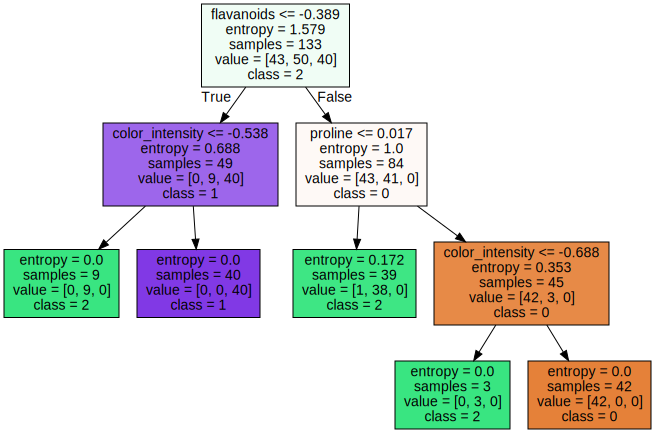

In [57]:
import graphviz
dot_data = export_graphviz(model, out_file=None, 
                                feature_names = X_train.columns,
                                class_names = y_train.astype(str).unique(),
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


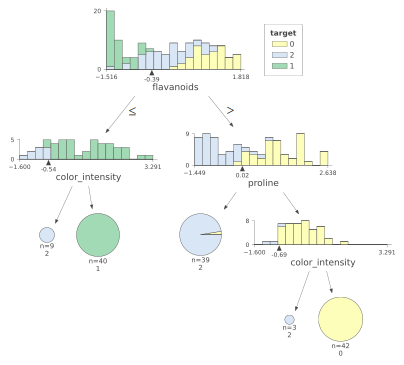

In [65]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model, X_train, y_train,
                target_name="target",
                feature_names = X_train.columns,
                class_names = list(y_train.astype(str).unique()))
viz

¿Qué exactitud lograste?

-  0.9334078884078882



¿Qué hiperparametros modificaste?

- max_depth
- min_samples_leaf
- min_samples_split
- criterion


¿Consideraste todas las variables?
- No solo las que seleccioné por estadísitca

¿Qué observaciones y conclusiones tienes de la base de datos que elegiste?

las características más relevantes son los flavonoides, intensidad de color y proline. 